In [38]:
import zipfile
z= zipfile.ZipFile("archive (2).zip")
z.extractall()

In [7]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
   ---------------------------------------- 0.1/38.8 MB 656.4 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.8 MB 655.4 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.8 MB 654.9 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.8 MB 655.8 kB/s eta 0:01:00
   ---------------------------------------- 0.2/38.8 MB 615.9 kB/s eta 0:01:03
   ---------------------------------------- 0.2/38.8 MB 655.9 kB/s eta 0:00:59
   ---------------------------------------- 0.2/38.8 MB 625.1 kB/s eta 0:01:02
   ---------------------------------------- 0.3/38.8 MB 628.5 kB/s eta 0:01:02
   ---------------------------------------- 0.3/38.8 MB 610.3 kB/s eta 0:01:04
   ---------------------------------------- 0.3/38.8 MB 614.4 kB/s eta 0:01:03
   ---------------------------------------- 0.3/38.8 MB 617.1

In [46]:
import os, shutil
import random
import numpy as np
import pandas as pd
import cv2
import skimage
import matplotlib.pyplot as plt
import skimage.segmentation
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [48]:
labels=['PNEUMONIA','NORMAL']

In [50]:
import os

def count_images_in_directory(directory_path):
    # Define valid image extensions
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    image_count = 0

    # Traverse the directory and count image files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(valid_extensions):
                image_count += 1
    
    return image_count

# Example usage:
directory_path0 = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray'  # Replace this with your directory path
image_count0 = count_images_in_directory(directory_path0)
print("Total number of images: ",image_count0)  # Display the result in Jupyter

directory_path1 = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/train'  # Replace this with your directory path
image_count1 = count_images_in_directory(directory_path1)
print("Total number of images in tra: ",image_count1)  # Display the result in Jupyter

directory_path2 = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/test'  # Replace this with your directory path
image_count2 = count_images_in_directory(directory_path2)
print("Total number of images in testing: ",image_count2)  # Display the result in Jupyter

directory_path3 = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/val'  # Replace this with your directory path
image_count3 = count_images_in_directory(directory_path3)
print("Total number of images in validation: ",image_count3)  # Display the result in Jupyter

Total number of images:  5856
Total number of images in tra:  5216
Total number of images in testing:  624
Total number of images in validation:  16


In [52]:
import os
from collections import Counter

def get_class_distribution(directory):
    labels = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            # Append the parent folder name (NORMAL or PNEUMONIA) as the label
            labels.append(os.path.basename(subdir))
    return Counter(labels)

# Paths to directories
train_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/train'
test_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/test'
val_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/val'

# Get class distributions
train_dist = get_class_distribution(train_path)
test_dist = get_class_distribution(test_path)
val_dist = get_class_distribution(val_path)

print("Train set class distribution:", train_dist)
print("Test set class distribution:", test_dist)
print("Validation set class distribution:", val_dist)


Train set class distribution: Counter({'PNEUMONIA': 3875, 'NORMAL': 1341})
Test set class distribution: Counter({'PNEUMONIA': 390, 'NORMAL': 234})
Validation set class distribution: Counter({'NORMAL': 8, 'PNEUMONIA': 8})


C:\Users\KARTHIK M\AppData\Local\Temp\ipykernel_22396\991080601.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_total, x='Class', y='Count', palette='viridis')


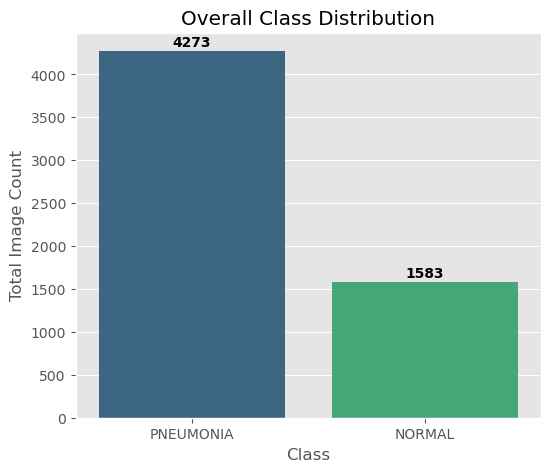

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Sum up counts across all sets for each class
total_dist = Counter({
    'PNEUMONIA': train_dist['PNEUMONIA'] + test_dist['PNEUMONIA'] + val_dist['PNEUMONIA'],
    'NORMAL': train_dist['NORMAL'] + test_dist['NORMAL'] + val_dist['NORMAL']
})

# Convert the distribution data into a DataFrame for plotting
df_total = pd.DataFrame(list(total_dist.items()), columns=['Class', 'Count'])

# Plot the bar chart
plt.figure(figsize=(6, 5))
ax = sns.barplot(data=df_total, x='Class', y='Count', palette='viridis')
plt.title('Overall Class Distribution')
plt.xlabel('Class')
plt.ylabel('Total Image Count')

# Add text annotations above each bar
for index, row in df_total.iterrows():
    ax.text(index, row.Count + 50, f"{row.Count}", color='black', ha="center", fontweight="bold")

plt.show()


## Pixel Intensity:
Pixel intensity refers to the brightness level of each pixel in the image. In grayscale images, intensity values typically range from 0 to 255.
- 0 represents black (no light intensity).
- 255 represents white (maximum light intensity).
- Values in between represent shades of gray, with lower values being darker and higher values being lighter.

In X-ray images, pixel intensity often correlates with the density of the materials being imaged. Darker regions (low intensity) represent 
less dense areas, while brighter regions (high intensity) represent denser structures like bones or opacities in the lungs.

## Frequency:
Frequency represents the count of pixels that have a particular intensity value.
- In the histogram, the height of each bar shows how many pixels in the image(s) have a specific intensity level.
- For example, if the bar corresponding to intensity 0 (black) is very tall, it indicates that there are many black pixels in the image.




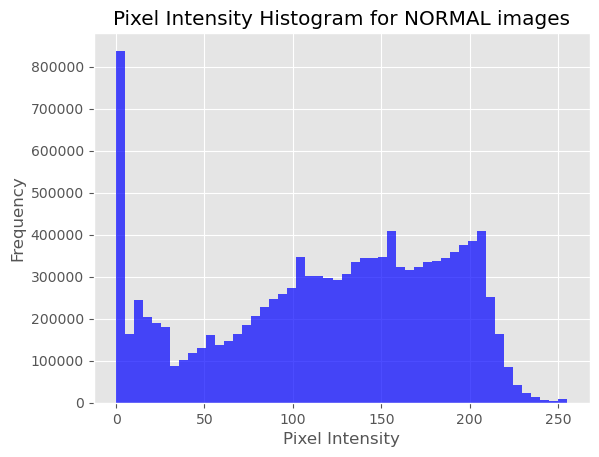

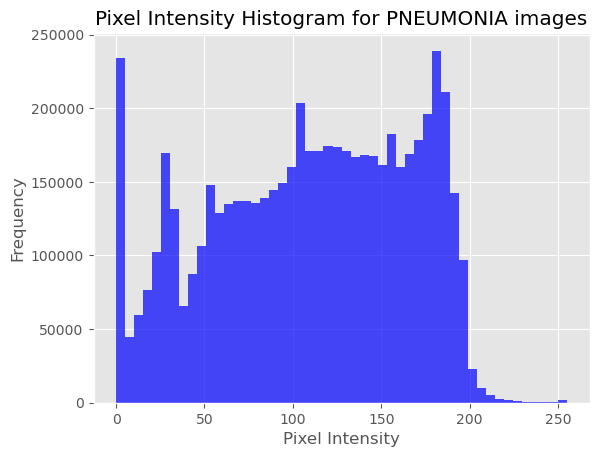

In [59]:

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
def plot_pixel_histogram(directory, class_name, num_images=5):
    pixel_values = []
    count = 0
    for subdir, _, files in os.walk(directory):
        if os.path.basename(subdir) == class_name:
            for file in files:
                if count >= num_images:
                    break
                file_path = os.path.join(subdir, file)
                with Image.open(file_path) as img:
                    pixel_values.extend(np.array(img).flatten())
                count += 1

    plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
    plt.title(f'Pixel Intensity Histogram for {class_name} images')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for NORMAL and PNEUMONIA images
plot_pixel_histogram(train_path, 'NORMAL')
plot_pixel_histogram(train_path, 'PNEUMONIA')


# Sample Visualization per Class

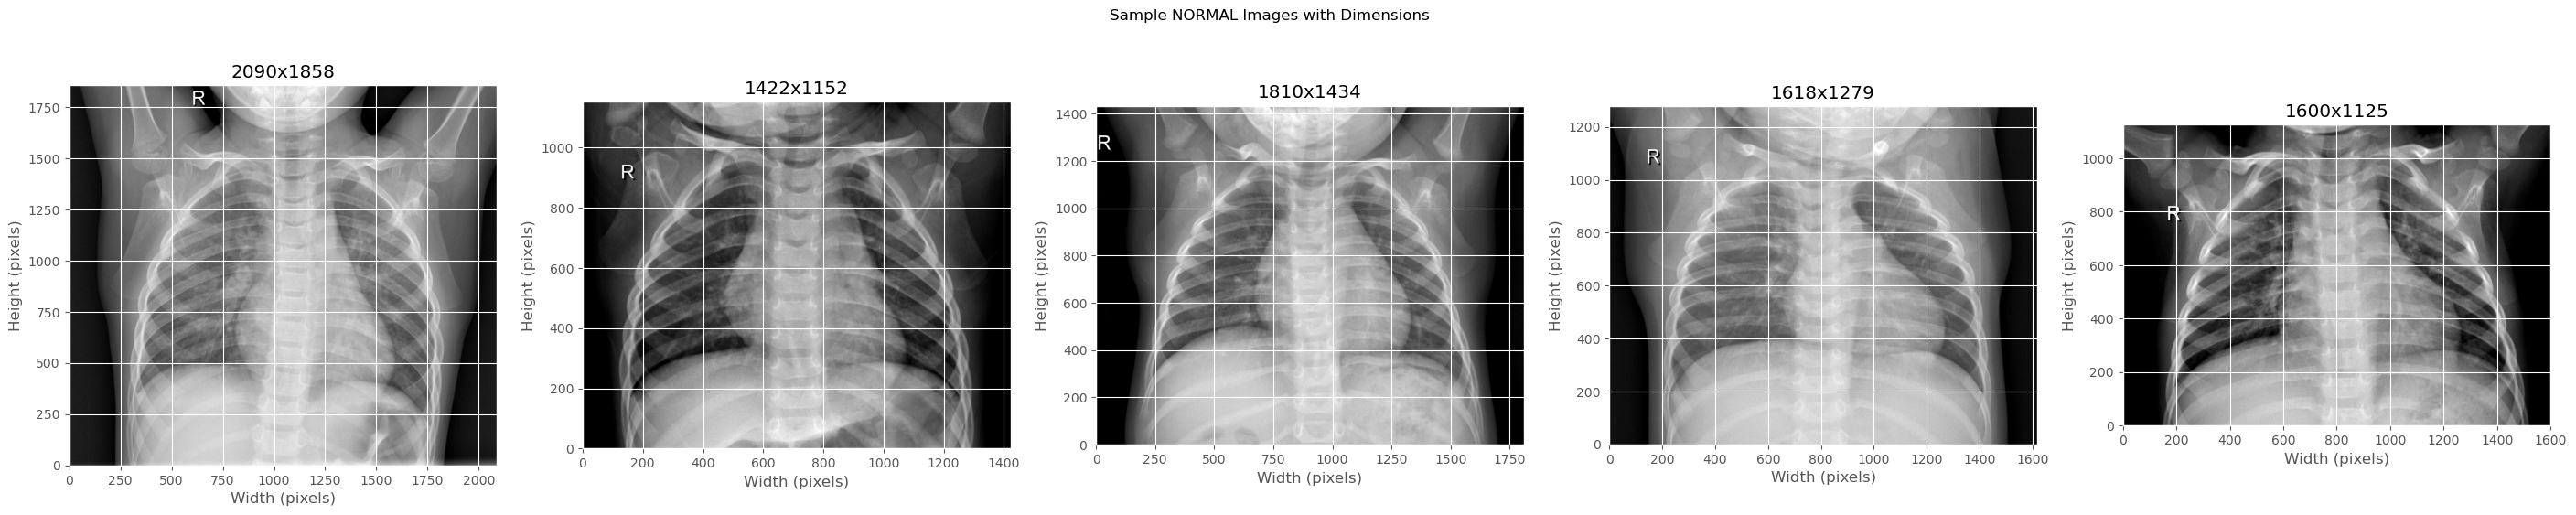

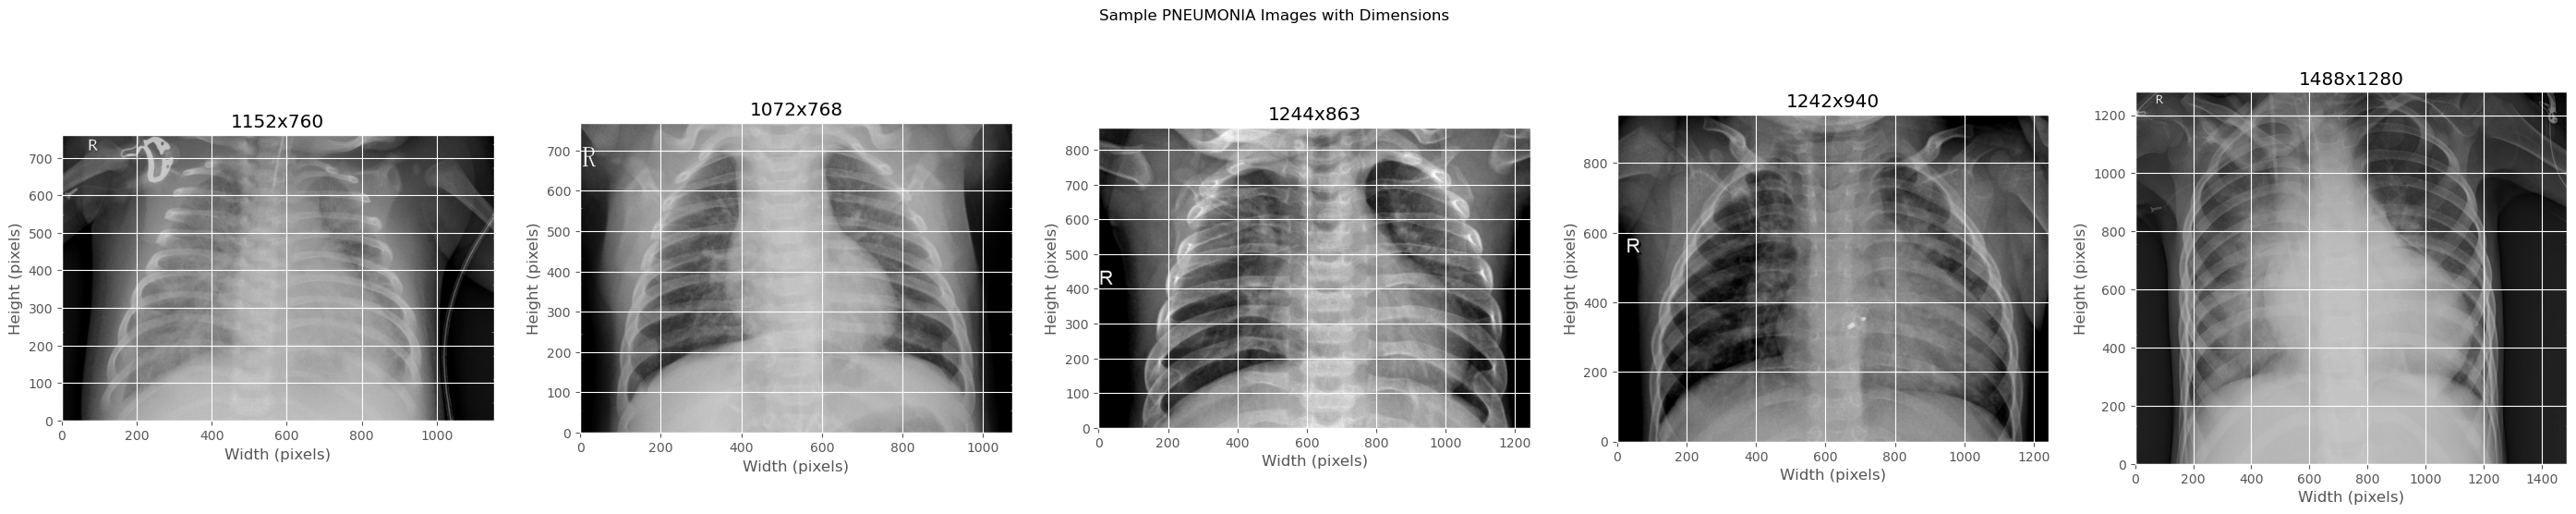

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images_with_dimensions(directory, class_name, num_images=5):
    images = []
    dimensions = []
    count = 0
    for subdir, _, files in os.walk(directory):
        if os.path.basename(subdir) == class_name:
            for file in files:
                if count >= num_images:
                    break
                file_path = os.path.join(subdir, file)
                with Image.open(file_path) as img:
                    img = img.convert('L')  # Convert to grayscale
                    img_array = np.array(img)  # Convert to numpy array
                    images.append(img_array)
                    dimensions.append(img_array.shape)  # Store (height, width)
                count += 1

    # Plot the images with dimensions
    plt.figure(figsize=(35, 6))
    for i, img in enumerate(images):
        height, width = dimensions[i]
        plt.subplot(1, num_images, i + 1)
        # Set the extent to match the image's actual size
        plt.imshow(img, cmap='gray', extent=[0, width, 0, height])
        plt.axis('on')
        plt.xlabel('Width (pixels)')
        plt.ylabel('Height (pixels)')
        plt.title(f"{width}x{height}")  # Width x Height

    plt.suptitle(f'Sample {class_name} Images with Dimensions')
    plt.show()

# Display sample images with dimensions
show_sample_images_with_dimensions(train_path, 'NORMAL')
show_sample_images_with_dimensions(train_path, 'PNEUMONIA')


In [64]:
from PIL import Image
import numpy as np

def analyze_image_dimensions(directory):
    dimensions = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            with Image.open(file_path) as img:
                dimensions.append(img.size)  # (width, height)
    dimensions = np.array(dimensions)
    return dimensions

# Analyze dimensions in training set
train_dimensions = analyze_image_dimensions(train_path)
print("Average dimensions (width, height):", train_dimensions.mean(axis=0))
print("Unique aspect ratios:", np.unique(train_dimensions[:, 0] / train_dimensions[:, 1]))


Average dimensions (width, height): [1320.61081288  968.07476994]
Unique aspect ratios: [0.83539095 0.87722048 0.88773549 ... 3.17857143 3.27152318 3.37878788]


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate the ImageDataGenerator with augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=20,            # Randomly rotate images up to 15 degrees
    width_shift_range=0.2,        # Randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,       # Randomly shift images vertically (10% of total height)
    shear_range=0.1,              # Shear transformations
    horizontal_flip=True,         # Randomly flip images horizontally
    vertical_flip=True,
    fill_mode='nearest'           # Fill mode for padding after transformations
)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen =ImageDataGenerator(rescale=1./255)

# Define the paths to the training data
train_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/train'

# Create a generator for the training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # For binary classification (NORMAL vs PNEUMONIA)
    shuffle=True,
    seed=12,
    color_mode="rgb"
)

val_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/val'
valid_generator = valid_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # For binary classification (NORMAL vs PNEUMONIA)
    shuffle=True,
    seed=12,
    color_mode="rgb"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


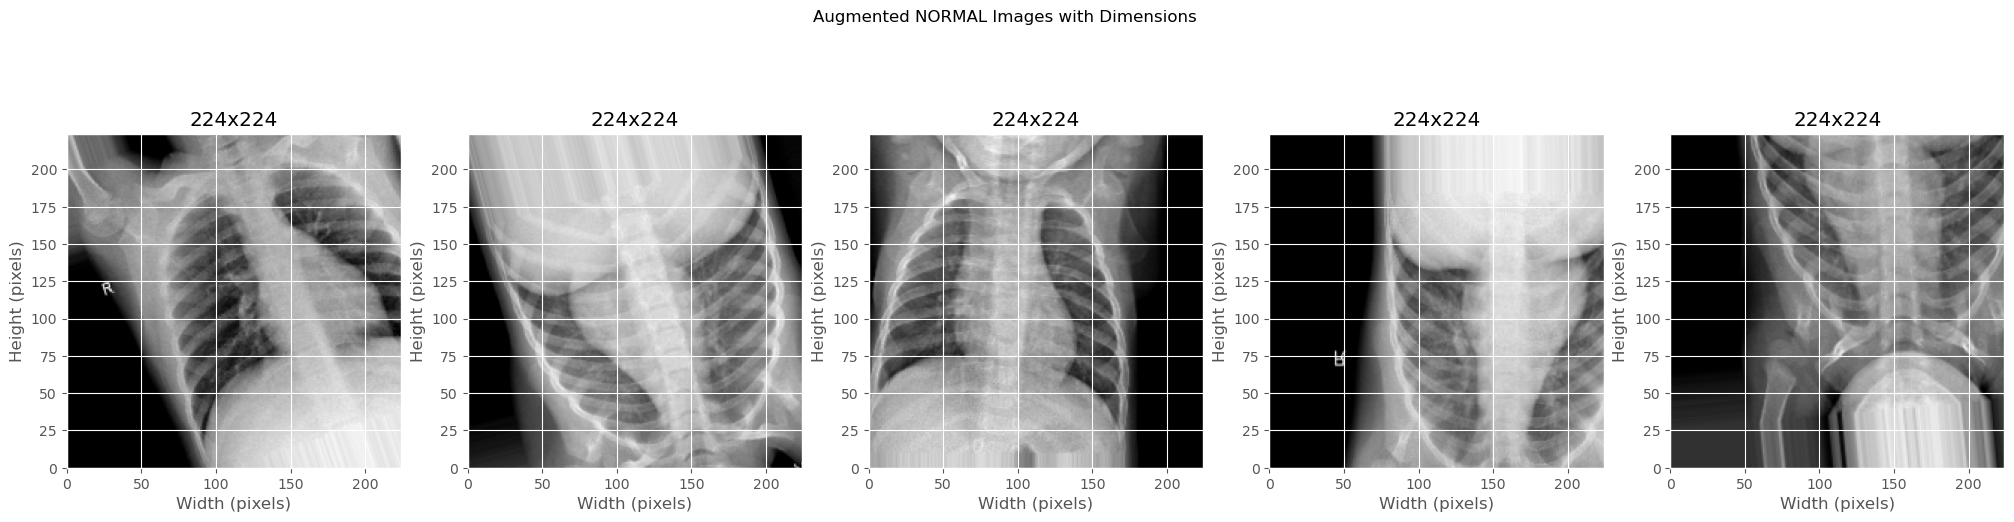

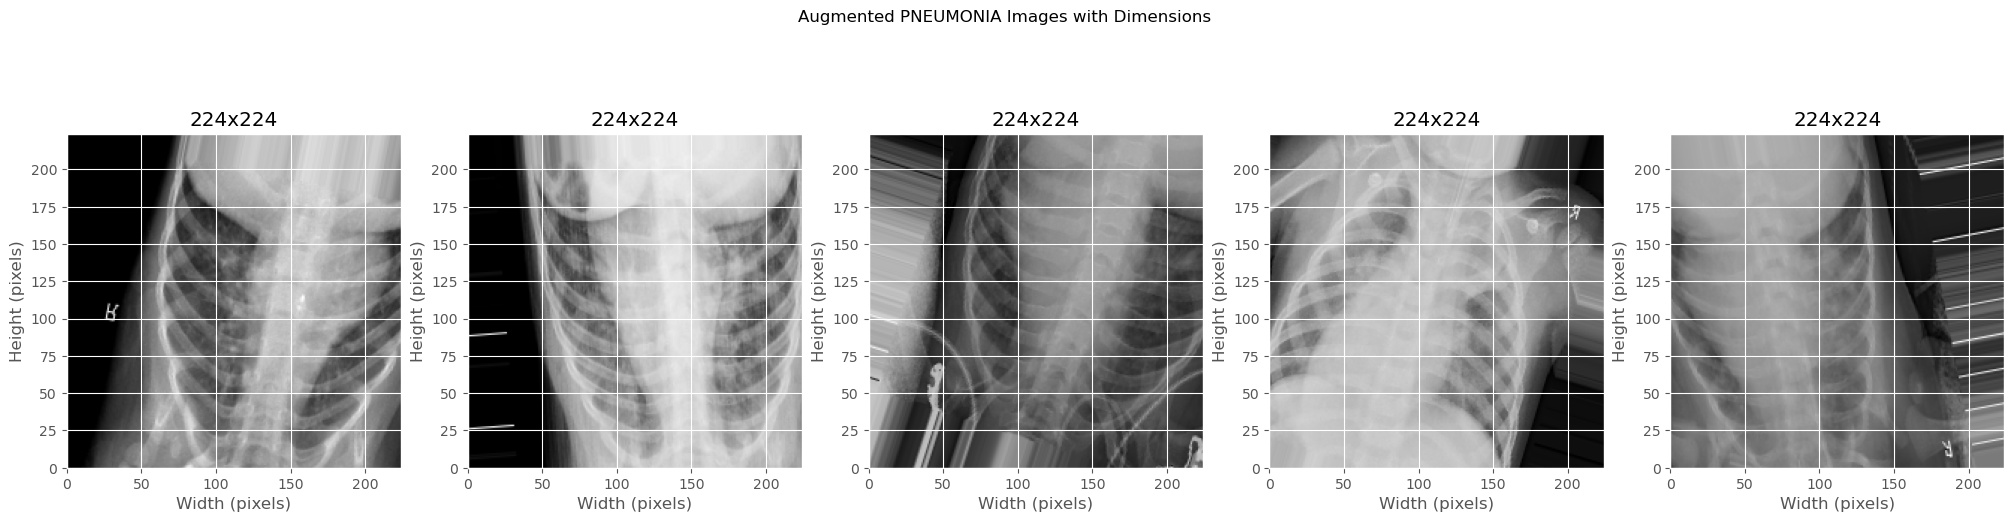

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def show_augmented_images_with_dimensions(generator, class_name, num_images=5):
    # Fetch a batch of images and labels from the generator
    images, labels = next(generator)

    # Class mapping from indices to class names
    class_labels = generator.class_indices
    class_names = {v: k for k, v in class_labels.items()}
    
    # Identify the label index for the desired class
    target_label = class_labels[class_name]
    
    # Filter images for the specified class
    selected_images = []
    dimensions = []
    count = 0

    for i in range(len(images)):
        # Check if the image matches the specified class
        if labels[i][target_label] == 1:
            img = images[i]
            img_height, img_width = img.shape[0], img.shape[1]
            selected_images.append(img)
            dimensions.append((img_width, img_height))  # Store width x height
            count += 1
        if count >= num_images:
            break

    # Plot the images with dimensions
    plt.figure(figsize=(25, 6))
    for i, img in enumerate(selected_images):
        width, height = dimensions[i]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray', extent=[0, width, 0, height])
        plt.axis('on')
        plt.xlabel('Width (pixels)')
        plt.ylabel('Height (pixels)')
        plt.title(f"{width}x{height}")  # Width x Height

    plt.suptitle(f'Augmented {class_name} Images with Dimensions')
    plt.show()

# Display augmented images with dimensions for both classes
show_augmented_images_with_dimensions(train_generator, 'NORMAL')
show_augmented_images_with_dimensions(train_generator, 'PNEUMONIA')


In [84]:
# Print the class labels
class_labels=train_generator.class_indices
class_labels


{'NORMAL': 0, 'PNEUMONIA': 1}

In [86]:
class_name={value:key for (key,value) in class_labels.items()}
class_name

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [88]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the pre-trained VGG19 model + higher level layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to prevent training
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(2, activation='softmax')(x)  # Output layer for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,480,322 (101.01 MB)

 Trainable params: 6,455,938 (24.63 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor="val_loss", patience=4, mode="min", verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stopping]
)

C:\Users\KARTHIK M\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8167 - loss: 0.3823

C:\Users\KARTHIK M\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1158s 7s/step - accuracy: 0.8170 - loss: 0.3819 - val_accuracy: 0.7500 - val_loss: 0.3553
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1069s 7s/step - accuracy: 0.8994 - loss: 0.2375 - val_accuracy: 0.7500 - val_loss: 0.5255
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1050s 6s/step - accuracy: 0.9139 - loss: 0.2156 - val_accuracy: 0.7500 - val_loss: 0.6401
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1006s 6s/step - accuracy: 0.9134 - loss: 0.2014 - val_accuracy: 0.7500 - val_loss: 0.4280
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 993s 6s/step - accuracy: 0.9321 - loss: 0.1626 - val_accuracy: 0.8125 - val_loss: 0.4569
Epoch 5: early stopping


In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=4, mode="min", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Train with adjusted callbacks
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 976s 6s/step - accuracy: 0.9350 - loss: 0.1593 - val_accuracy: 0.8125 - val_loss: 0.4017 - learning_rate: 1.0000e-04
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1963s 12s/step - accuracy: 0.9356 - loss: 0.1522 - val_accuracy: 0.8125 - val_loss: 0.3992 - learning_rate: 1.0000e-04
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 995s 6s/step - accuracy: 0.9456 - loss: 0.1393 - val_accuracy: 0.9375 - val_loss: 0.1564 - learning_rate: 1.0000e-04
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 967s 6s/step - accuracy: 0.9359 - loss: 0.1572 - val_accuracy: 0.8125 - val_loss: 0.2450 - learning_rate: 1.0000e-04
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9470 - loss: 0.1388
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 980s 6s/step - accuracy: 0.9470 - loss: 0.1388 - val_accuracy: 0.8125 - val_loss: 0.4067 - learning_rate: 1.0000e-04
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2539s 16s/step - accura

In [94]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the file path with the .keras extension
checkpoint_path = "model.keras"

# Add ModelCheckpoint to save the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_loss",  # Save model with the lowest validation loss
    mode="min",
    save_best_only=True,
    verbose=1
)

# Define all callbacks including ModelCheckpoint
early_stopping = EarlyStopping(monitor="val_loss", patience=4, mode="min", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

C:\Users\KARTHIK M\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8107 - loss: 0.3984
Epoch 1: val_loss improved from inf to 0.73288, saving model to model.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 1049s 6s/step - accuracy: 0.8109 - loss: 0.3980 - val_accuracy: 0.7500 - val_loss: 0.7329 - learning_rate: 1.0000e-04
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8913 - loss: 0.2552
Epoch 2: val_loss did not improve from 0.73288
163/163 ━━━━━━━━━━━━━━━━━━━━ 1090s 7s/step - accuracy: 0.8913 - loss: 0.2551 - val_accuracy: 0.6250 - val_loss: 0.9531 - learning_rate: 1.0000e-04
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9062 - loss: 0.2234
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 3: val_loss did not improve from 0.73288
163/163 ━━━━━━━━━━━━━━━━━━━━ 1059s 6s/step - accuracy: 0.9062 - loss: 0.2233 - val_accuracy: 0.6250 - val_loss: 0.9819 - learning_rate: 1.0000e-04
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accu

In [96]:
import os

if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model.save(filepath = "model_weights/vgg19_model.keras", overwrite=True)


In [98]:
test_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/test'
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # For binary classification (NORMAL vs PNEUMONIA)
    shuffle=True,
    seed=12,
    color_mode="rgb"
)


Found 624 images belonging to 2 classes.


In [100]:
model.load_weights("model_weights/vgg19_model.keras")

vgg_val_eval=model.evaluate(valid_generator)
vgg_test_eval=model.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8125 - loss: 0.3360


C:\Users\KARTHIK M\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 241s 12s/step - accuracy: 0.8910 - loss: 0.3145


# unfreezing and fine tuning

In [102]:
# Load the pre-trained VGG19 model + higher level layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_layer_names=[layer.name for layer in base_model.layers]
base_model_layer_names

['input_layer_4',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [104]:
# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(2, activation='softmax')(x)  # Output layer for binary classification

model_1=Model(inputs=base_model.input, outputs=output)
model_1.load_weights("model_weights/vgg19_model.keras")

# Unfreeze the last 4 layers of the VGG19 base model
set_trainable = False
for layer in base_model.layers:
    if layer.name in ['block5_conv3','block5_conv4']:
        set_trainable = True
    if set_trainable:
        set_trainable = True
    else :
        set_trainable = False

model_1.summary()



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,480,322 (101.01 MB)

 Trainable params: 26,480,322 (101.01 MB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history_1 = model_1.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.7875 - loss: 0.5419 
Epoch 1: val_loss did not improve from 0.27101
163/163 ━━━━━━━━━━━━━━━━━━━━ 4262s 26s/step - accuracy: 0.7878 - loss: 0.5409 - val_accuracy: 0.6875 - val_loss: 0.6651 - learning_rate: 1.0000e-04
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.8734 - loss: 0.3056 
Epoch 2: val_loss did not improve from 0.27101
163/163 ━━━━━━━━━━━━━━━━━━━━ 4027s 25s/step - accuracy: 0.8735 - loss: 0.3054 - val_accuracy: 0.6250 - val_loss: 1.3235 - learning_rate: 1.0000e-04
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 239s/step - accuracy: 0.9039 - loss: 0.2267  
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 3: val_loss did not improve from 0.27101
163/163 ━━━━━━━━━━━━━━━━━━━━ 38781s 239s/step - accuracy: 0.9039 - loss: 0.2268 - val_accuracy: 0.6250 - val_loss: 0.8103 - learning_rate: 1.0000e-04
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.9281 - 

In [114]:
# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history_1 = model_1.fit(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=100,
    epochs=1,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.9208 - loss: 0.2086 WARNING:tensorflow:5 out of the last 37 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x000002A1A1DC2CA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

Epoch 1: val_loss did not improve from 0.27101
100/100 ━━━━━━━━━━━━━━━━━━━━ 2124s 21s/step - accuracy: 0.9208 - loss: 0.2085 - val_accuracy: 0.7500 - val_loss: 0.4514 - learning_rate: 1.0000e-04


Unfreezing all blocks

In [7]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Load the pre-trained VGG19 model + higher level layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(2, activation='softmax')(x)  # Output layer for binary classification

model_2=Model(inputs=base_model.input, outputs=output)
model_2.load_weights("model_weights/vgg19_model.keras")

model_2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,480,322 (101.01 MB)

 Trainable params: 26,480,322 (101.01 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Define the file path with the .keras extension
checkpoint_path = "model_2.keras"

# Add ModelCheckpoint to save the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_loss",  # Save model with the lowest validation loss
    mode="min",
    save_best_only=True,
    verbose=1
)

# Define all callbacks including ModelCheckpoint
early_stopping = EarlyStopping(monitor="val_loss", patience=4, mode="min", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Train the model with callbacks
history_2 = model_2.fit(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=100,
    epochs=1,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

C:\Users\KARTHIK M\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.7817 - loss: 0.7237 

C:\Users\KARTHIK M\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.25348, saving model to model_2.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 1905s 19s/step - accuracy: 0.7822 - loss: 0.7207 - val_accuracy: 0.6250 - val_loss: 1.2535 - learning_rate: 1.0000e-04


Xception model

In [35]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Load the Xception base model without the top (classification) layer
base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Freeze the layers in the base model
base_model.trainable = False

# Build the Model
model_4 = Sequential()

# Base Model
model_4.add(base_model)

# Batch Normalization
model_4.add(BatchNormalization())

# Dropout Layer
model_4.add(Dropout(0.45))

# Dense Layer 1
model_4.add(Dense(220, activation='relu'))

# Dropout Layer
model_4.add(Dropout(0.25))

# Dense Layer 2
model_4.add(Dense(60, activation='relu'))

# Output Layer with 2 units for categorical output
model_4.add(Dense(2, activation='softmax'))

# Compile the model
model_4.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 220)                 │         450,780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 60)                  │          13,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             122 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,333,834 (81.38 MB)

 Trainable params: 468,258 (1.79 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

In [37]:
# Define the file path with the .keras extension
checkpoint_path = "model_4.keras"

# Add ModelCheckpoint to save the best model
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_loss",  # Save model with the lowest validation loss
    mode="min",
    save_best_only=True,
    verbose=1
)

# Define all callbacks including ModelCheckpoint
early_stopping = EarlyStopping(monitor="val_loss", patience=4, mode="min", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Train the model with callbacks
history = model_4.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8633 - loss: 0.3233
Epoch 1: val_loss improved from inf to 0.43040, saving model to model_4.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.8635 - loss: 0.3229 - val_accuracy: 0.8125 - val_loss: 0.4304 - learning_rate: 0.0010
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9160 - loss: 0.2091
Epoch 2: val_loss improved from 0.43040 to 0.30992, saving model to model_4.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 347s 2s/step - accuracy: 0.9160 - loss: 0.2091 - val_accuracy: 0.8125 - val_loss: 0.3099 - learning_rate: 0.0010
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9246 - loss: 0.1868
Epoch 3: val_loss did not improve from 0.30992
163/163 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9246 - loss: 0.1868 - val_accuracy: 0.8750 - val_loss: 0.3189 - learning_rate: 0.0010
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9196 - loss: 0.1903
Epoch 4: ReduceLROnPlateau 

In [39]:
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Step 1: Unfreeze the last few layers of the base model for fine-tuning
# Set all layers to trainable in base_model
for layer in model_4.layers[0].layers:
    layer.trainable = True  # Unfreeze all layers

# Alternatively, unfreeze only the last few layers
for layer in model_4.layers[0].layers[:-20]:  # Keep the first layers frozen
    layer.trainable = False

# Step 2: Compile the model with a lower learning rate for fine-tuning
model_4.compile(optimizer=Adamax(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 220)                 │         450,780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 60)                  │          13,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             122 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,333,834 (81.38 MB)

 Trainable params: 7,794,634 (29.73 MB)

 Non-trainable params: 13,539,200 (51.65 MB)

In [41]:

# Define callbacks for fine-tuning
checkpoint_path = "model_4_finetuned.keras"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
)
early_stopping = EarlyStopping(monitor="val_loss", patience=4, mode="min", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Step 3: Fine-tune the model
history_finetune = model_4.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,  # You can adjust this based on validation performance
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8705 - loss: 0.3261
Epoch 1: val_loss improved from inf to 0.44955, saving model to model_4_finetuned.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - accuracy: 0.8706 - loss: 0.3259 - val_accuracy: 0.8125 - val_loss: 0.4495 - learning_rate: 1.0000e-05
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9052 - loss: 0.2453
Epoch 2: val_loss improved from 0.44955 to 0.28164, saving model to model_4_finetuned.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 483s 3s/step - accuracy: 0.9052 - loss: 0.2453 - val_accuracy: 0.8125 - val_loss: 0.2816 - learning_rate: 1.0000e-05
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9149 - loss: 0.2207
Epoch 3: val_loss improved from 0.28164 to 0.25050, saving model to model_4_finetuned.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 476s 3s/step - accuracy: 0.9149 - loss: 0.2207 - val_accuracy: 0.8125 - val_loss: 0.2505 - learning_rate: 1.0000e-05
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━

In [45]:
import os

if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model_4.save(filepath = "model_weights/Xception_model.keras", overwrite=True)

In [47]:
test_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/test'
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # For binary classification (NORMAL vs PNEUMONIA)
    shuffle=True,
    seed=12,
    color_mode="rgb"
)

Found 624 images belonging to 2 classes.


In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/model_weights/Xception_model.keras')

Xception_val_eval=model.evaluate(valid_generator)
Xception_test_eval=model.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.1995
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8482 - loss: 0.3585


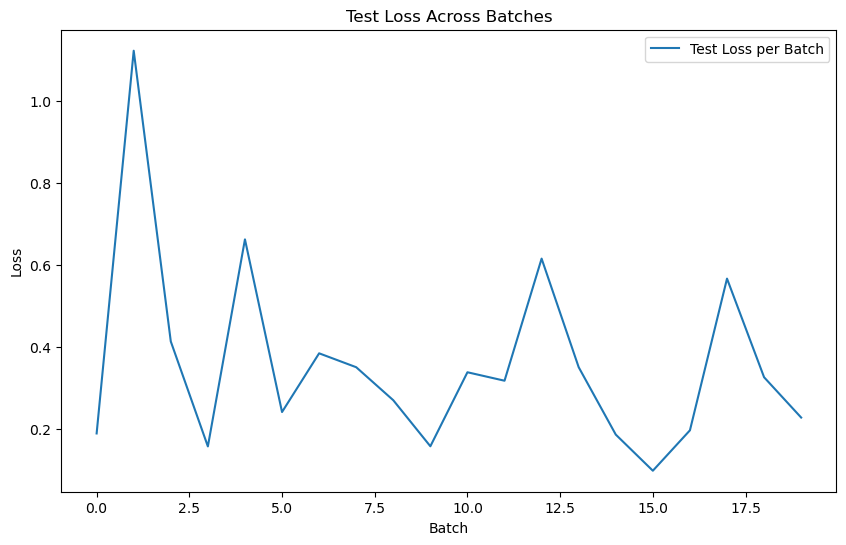

In [93]:
# Evaluate the model on each batch of the test set and record loss per batch
loss_per_batch = []
for i, (images, labels) in enumerate(test_generator):
    batch_loss, batch_accuracy = model_4.evaluate(images, labels, verbose=0)
    loss_per_batch.append(batch_loss)
    
    # Break loop if we've gone through the entire dataset
    if i >= len(test_generator) - 1:
        break

# Plot the test loss over batches
plt.figure(figsize=(10, 6))
plt.plot(loss_per_batch, label='Test Loss per Batch')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Test Loss Across Batches')
plt.legend()
plt.show()

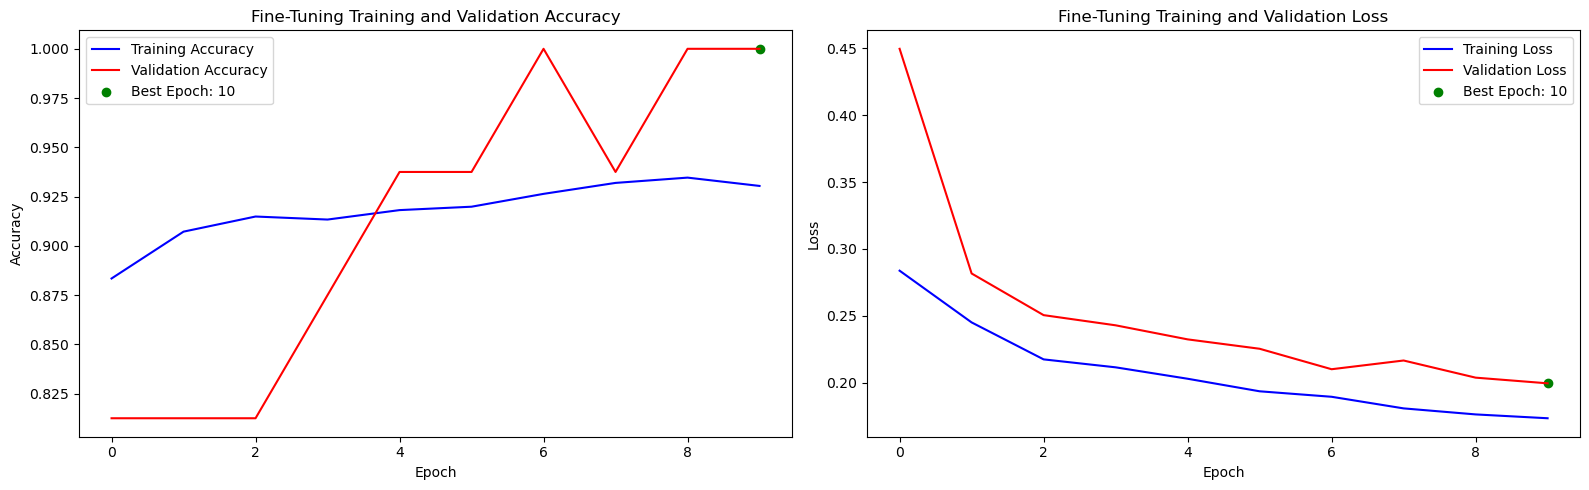

In [63]:
import matplotlib.pyplot as plt

# Find the epoch with the lowest validation loss
best_epoch = history_finetune.history['val_loss'].index(min(history_finetune.history['val_loss'])) + 1

# Create subplots for accuracy and loss
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history_finetune.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history_finetune.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history_finetune.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Fine-Tuning Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history_finetune.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history_finetune.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history_finetune.history['val_loss'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Fine-Tuning Training and Validation Loss')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


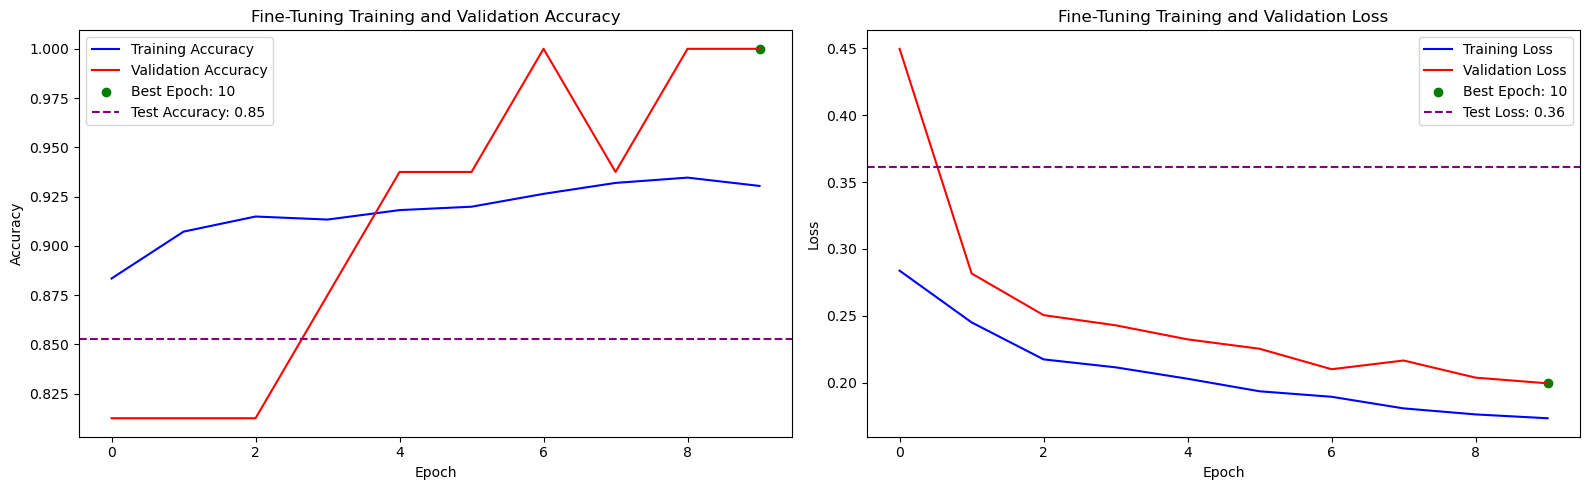

In [95]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model_4.evaluate(test_generator, verbose=0)

# Find the best epoch based on the minimum validation loss
best_epoch = history_finetune.history['val_loss'].index(min(history_finetune.history['val_loss'])) + 1

# Create subplots for accuracy and loss
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history_finetune.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history_finetune.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history_finetune.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].axhline(y=test_accuracy, color='purple', linestyle='--', label=f'Test Accuracy: {test_accuracy:.2f}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Fine-Tuning Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history_finetune.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history_finetune.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history_finetune.history['val_loss'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[1].axhline(y=test_loss, color='purple', linestyle='--', label=f'Test Loss: {test_loss:.2f}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Fine-Tuning Training and Validation Loss')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


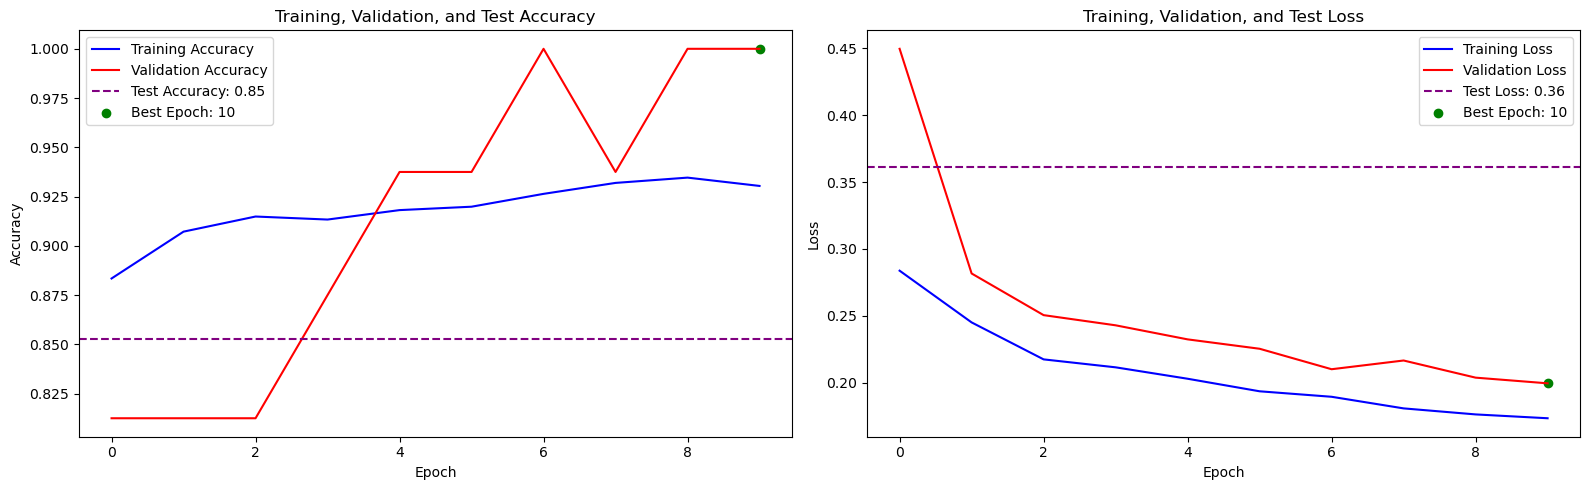

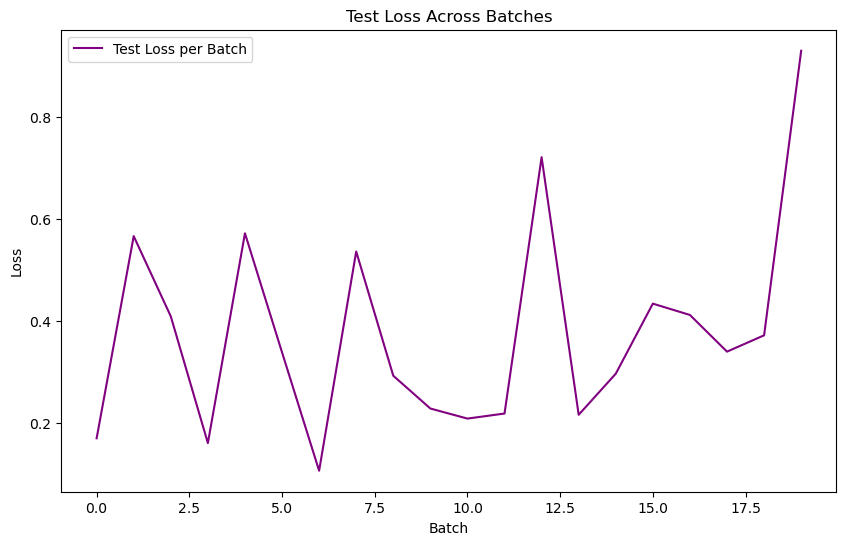

In [97]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model_4.evaluate(test_generator, verbose=0)

# Find the best epoch based on the minimum validation loss
best_epoch = history_finetune.history['val_loss'].index(min(history_finetune.history['val_loss'])) + 1

# Create subplots for accuracy and loss in one figure
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history_finetune.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history_finetune.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].axhline(y=test_accuracy, color='purple', linestyle='--', label=f'Test Accuracy: {test_accuracy:.2f}')
axs[0].scatter(best_epoch - 1, history_finetune.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training, Validation, and Test Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history_finetune.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history_finetune.history['val_loss'], label='Validation Loss', color='red')
axs[1].axhline(y=test_loss, color='purple', linestyle='--', label=f'Test Loss: {test_loss:.2f}')
axs[1].scatter(best_epoch - 1, history_finetune.history['val_loss'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training, Validation, and Test Loss')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Optionally, you can also plot the loss across batches (this part is not necessary for combined plot)
loss_per_batch = []
for i, (images, labels) in enumerate(test_generator):
    batch_loss, batch_accuracy = model_4.evaluate(images, labels, verbose=0)
    loss_per_batch.append(batch_loss)
    if i >= len(test_generator) - 1:
        break

# Plot test loss per batch if needed
plt.figure(figsize=(10, 6))
plt.plot(loss_per_batch, label='Test Loss per Batch', color='purple')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Test Loss Across Batches')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1
Predicted Class: PNEUMONIA


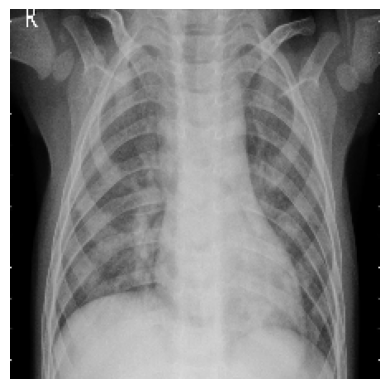

In [39]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/model_weights/Xception_model.keras')

# Define the target size for the image (224x224)
target_size = (224, 224)

# Load the image
image_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/test/PNEUMONIA/person37_virus_82.jpeg'
img = cv2.imread(image_path)

# Resize the image to the target size
img_resized = cv2.resize(img, target_size)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Normalize the image (same preprocessing as used during training)
img_array = np.expand_dims(img_rgb, axis=0) / 255.0

# Predict the class probabilities
prediction = model.predict(img_array)

# The model output is a 2D array: [[probability_normal, probability_pneumonia]]
# Find the index of the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Define class names (based on how your model was trained)
class_names = ['NORMAL', 'PNEUMONIA']

# Get the predicted class using the index
predicted_class = class_names[predicted_class_index]
print(predicted_class_index)
# Print the result
print(f"Predicted Class: {predicted_class}")

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [41]:
predicted_class_index

1

In [43]:
prediction

array([[0.00175005, 0.99824995]], dtype=float32)

In [47]:
# Print the class labels
class_labels=train_generator.class_indices
class_labels


{'NORMAL': 0, 'PNEUMONIA': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: NORMAL
[[0.6887568  0.31124312]]


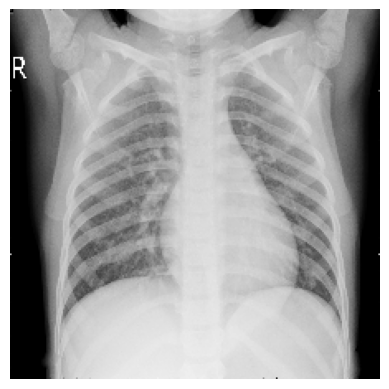

In [63]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/model_weights/Xception_model.keras')

# Define the target size for the image (224x224 for Xception)
target_size = (224, 224)

# Load the image
image_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'
img = cv2.imread(image_path)

# Resize the image to the target size
img_resized = cv2.resize(img, target_size)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Normalize the image (same preprocessing as used during training)
img_array = np.expand_dims(img_rgb, axis=0) / 255.0

# Predict the class probabilities
prediction = model.predict(img_array)

# Get class labels from the training data (train_generator)
class_labels = train_generator.class_indices

# Reverse the class labels to get a mapping from index to class name
class_labels = {v: k for k, v in class_labels.items()}

# Find the index of the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Get the predicted class using the index
predicted_class = class_labels[predicted_class_index]

# Print the result
print(f"Predicted Class: {predicted_class}")
print(prediction)
#
# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
Predicted Class: NORMAL
[[0.5488647  0.45113528]]


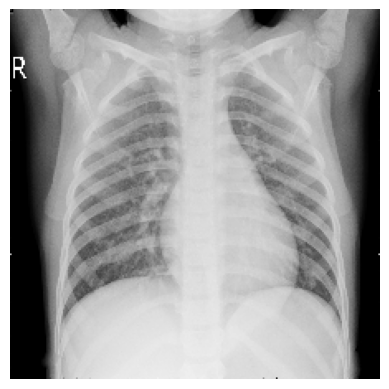

In [64]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/model_weights/vgg19_model.keras')

# Define the target size for the image (224x224 for Xception)
target_size = (224, 224)

# Load the image
image_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'
img = cv2.imread(image_path)

# Resize the image to the target size
img_resized = cv2.resize(img, target_size)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Normalize the image (same preprocessing as used during training)
img_array = np.expand_dims(img_rgb, axis=0) / 255.0

# Predict the class probabilities
prediction = model.predict(img_array)

# Get class labels from the training data (train_generator)
class_labels = train_generator.class_indices

# Reverse the class labels to get a mapping from index to class name
class_labels = {v: k for k, v in class_labels.items()}

# Find the index of the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Get the predicted class using the index
predicted_class = class_labels[predicted_class_index]

# Print the result
print(f"Predicted Class: {predicted_class}")
print(prediction)
# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: NORMAL
[[0.6887568  0.31124312]]


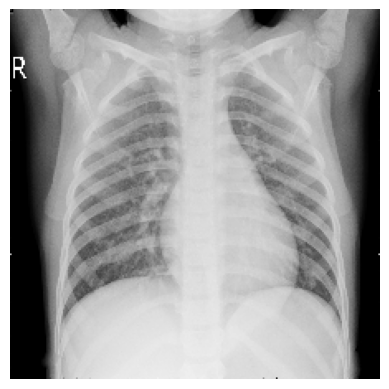

In [71]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/model_weights/Xception_model.keras')

# Define the target size for the image (224x224)
target_size = (224, 224)

# Load the image
image_path = 'C:/Users/KARTHIK M/Documents/College works/M.Sc Data Science/deep learning/project/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'
img = cv2.imread(image_path)

# Resize the image to the target size
img_resized = cv2.resize(img, target_size)

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Normalize the image (same preprocessing as used during training)
img_array = np.expand_dims(img_rgb, axis=0) / 255.0

# Predict the class probabilities
prediction = model.predict(img_array)

# The model output is a 2D array: [[probability_normal, probability_pneumonia]]
# Find the index of the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Define class names (based on how your model was trained)
class_names = ['NORMAL', 'PNEUMONIA']

# Get the predicted class using the index
predicted_class = class_names[predicted_class_index]

# Print the result
print(f"Predicted Class: {predicted_class}")
print(prediction)
# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()
